# Практическая работа №3: Статистический анализ социальных сетей.
Выполнила студентка гр. 0381 Ионина Ксения. Вариант №6

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения



**Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними.

>$ D_{ij}=(X_{ij},X_{ji}), \: i \neq j $ 

Виды диад:

*   Взаимная диада. $D_{ij}=(1,1)$
*   Асимметричная диада.  $D_{ij}=(1,0), D_{ij}=(0,1)$
*   Нулевая диада. $D_{ij}=(0,0)$

**Цензус диад** $-$ тройка чисел $<M, A, N>$, где
$M=\sum_{i<g}X_{ij}X_{ji}  \: -$ количество взаимных диад
$A=X_{++}-2M  \: -$ количество асимметричных диад
$N=\Large{\binom{g}{2}}$$-A-M-$количество нулевых диад

**Индекс взаимности Каца-Пауэлла** $-$ характеристика измерения тенденции акторов в группе:

>$ \infty< p_{kp } \leqslant 1$

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом.

---

*fix выбор*



*   Предполагается, что каждый актор делает $d$ выборов из $(g-1)$ акторов, доступных для выбора.
*   Вероятность взаимного актора между любой произвольной парой равна $\: \Large \frac{d^{2}}{(g-1)^{2}}$
*   Математическое ожидание взаимных диад:
  $EM= \Large \frac{g(g-1)}{2}\frac{d^{2}}{(g-1)^{2}}=\frac{gd^{2}}{2(g-1)}$
*   Оценка $  \: p_{kp } \:$ по методу моментов:


  $\Large \widehat{p_{kp }}=\frac{2(g-1)(M-gd^{2})}{gd(g-1-d)}$



---
*Свободный выбор*

*  Пусть $i$-й актор выбирает  $ \: d_{0}(n_{i})=x_{i+} \:$ других акторов
*   Пусть $  \: L= \sum_{i}x_{i+},  \: L_{2}= \sum_{i}x_{i+}^{2} \:$ по методу моментов:
*   Вероятность того, что акторы имеют взаимные отношения равна $  \: x_{i+}x_{j+}/(g-1)^{2} \:$ 
*   Математическое ожидание взаимных диад:


  $EM= \Large \frac{L^{2}-L_{2}}{2(g-1)^{2}}$
*   Оценка $  \: p_{kp } \:$ по методу моментов:
  $\Large \widehat{{p_{kp }}}'=\frac{2(g-1)^{2}(M-L^{2}+L_{2})}{L(g-1)^{2}-L^{2}+L_{2}}$

---
  **Индекс взаимности Бандиопадхьяйя**


*   Данный индекс основан на минимальном и максимальном значениях количества взаимных диад
*   Значение индекса:


$p_{B}=\frac{M-M^{min}}{M^{max}-M^{min}}$

Функция$\: f(t):$

$f(t)=\sum_{i=1}^{t}x_{i+}-t(g-1)-\binom{t}{2}$

Функция$\: g(t):$

$g(t)=\sum_{i=1}^{t}x_{i+}-t(t-1)-\sum_{i=t+1}^{g}min(t,x_{i+})$


  **Анализ $k$-подграфов**
  *   Определить количество классов изоморфизма, т.е. количество различных состояний, которые могут принимать $k$-подграфы.
  *   Рассмотреть все возможные подмножества из $k$ акторов  ($k$- подграфов) в ориентированном графе с $g$ узлами.
  *   Определить каждый $k$-подграф в правильный класс изоморфизма и определить, сколько $k$-подграфов попадает в каждый класс.
  *   Изучить статистическими или описательными методами частоту появления $k$-подграфа в классах изоморфизма.


   **Статистический анализ количества дуг**
  *   Число дуг: $\: L\sim B(g,(g-1),1/2) $
  *   Вероятность того, что число дуг в орграфе равно $L$:
   $\:P(L=I)=\Large \binom{g(g-1)}{I}$$2^{g(1-g)}$
  *   Математическое ожидание: $\: E(L)=\Large \binom{g}{2} $
  *   Дисперсия: $\: D(L)=\Large 1/2\binom{g}{2} $

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [92]:
#подключение библиотек
install.packages('network')
install.packages('igraph')
install.packages('sna')
install.packages('HyperG')

library(network)
library(igraph)
library(sna)
library(HyperG)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##1. Смоделирован случайный орграф $\mathscr{G}_{d}$ на основе модели Эрдеша—Реньи: $\mathscr{G}_{d}=\mathscr{G}(g, p)$, где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами.


**Вариант 6: g=83, p=0.65,  $\alpha=0.05$, $P_{0}=0.63$**

In [93]:
g <- 83
p <- 0.65
my_gr <- sample_gnp(g, p, directed=TRUE)

Модель Эрдёша-Реньи — модель генерации случайных графов, в которой все графы с фиксированным набором вершин и фиксированным набором рёбер одинаково вероятны (имеют одинаковую вероятность $p^{M}(1-p)^{\binom{1}{2}-M}$). Существует два тесно связанных варианта модели: биномиальная и равномерная.

##2. Отобразить полученный орграф.

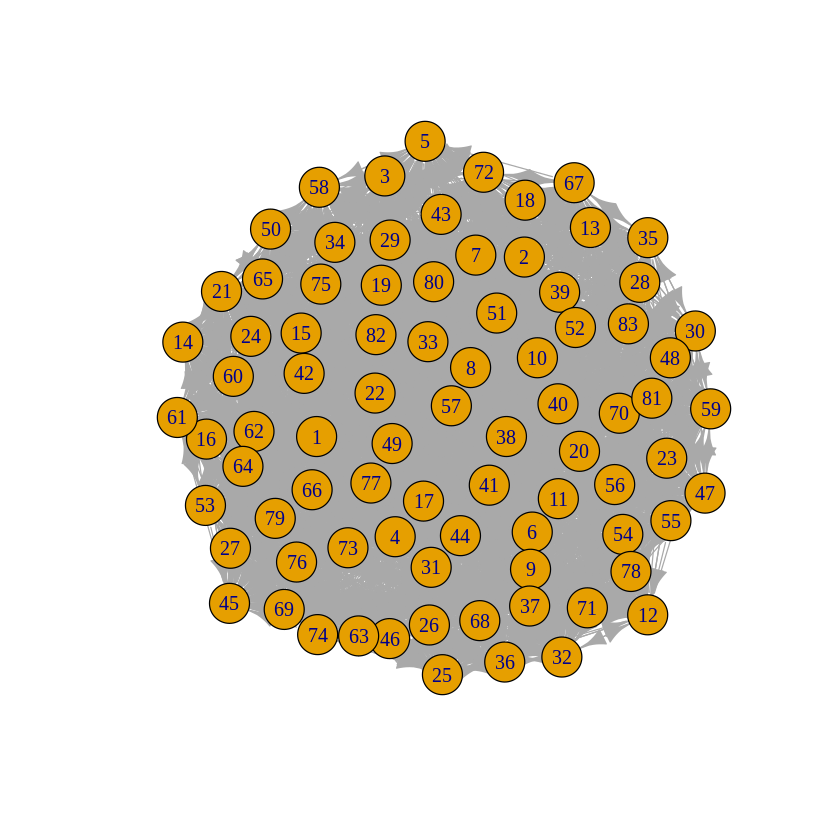

In [94]:
l <- layout.fruchterman.reingold(my_gr)
plot(my_gr, layout=l)

##3. Вычислить пятичисловую сводку для графа.

In [95]:
my_net <- as.network(as.matrix(my_gr, "edgelist"), directed=TRUE)

geoDistances <- geodist(my_net) 
print(paste('Размер сети:', network.size(my_net)))
print(paste('Диаметр: ', max(geoDistances$gdist)))
print(paste('Компоненты сети:', components(my_net)))
print(paste('Плотность сети:', gden(my_net, mode="graph")))
print(paste('Коэффициент кластеризации: ', gtrans(my_net, mode = "graph")))

[1] "Размер сети: 83"
[1] "Диаметр:  2"
[1] "Компоненты сети: 1"
[1] "Плотность сети: 0.639435791948281"
[1] "Коэффициент кластеризации:  0.640469978524395"


##4. Вычислить цензус диад. Сделать выводы.

In [96]:
census <- dyad_census(my_gr)
print(paste('M:', census$mut))
print(paste('A:', census$asym))
print(paste('N:', census$null))

[1] "M: 1388"
[1] "A: 1576"
[1] "N: 439"


**Вывод:** Из цензуса диад можно сделать вывод, что в графе немного пар акторов, между которыми отсутствует связь, в то время как большинство пар имеют между собой хотя бы одностороннюю связь.

##5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

In [97]:
Powell_fix <- function(d, Gr, g) {
M <- dyad_census(Gr)$mut
result <- (2*(g-1)*M - g*d*d)/(g*d*(g-1-d))
return (result)
}

Powell_free <- function(G, g) {
M <- dyad_census(G)$mut
L <- sum(igraph::degree(G, mode="in"))
L_2 <- sum(igraph::degree(G, mode="in")^2)
result <- (2*(g-1)^2*M-L^2+L_2)/(L*(g-1)^2-L^2+L_2)
return (result)
}

fix <- Powell_fix(22, my_gr , 83)
print(fix)
free <- Powell_free(my_gr , 83)
print(free)



[1] 1.711026
[1] -0.004175701


**Вывод:** При фиксированном  выборе акторов вычисляемый индекс больше, чем при свободном.
При свободном выборе акторы образуют меньше взаимных связей.

##6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [98]:
free <- (rowSums(matr) * colSums(matr))/(g - 1)^2
res_free <- sum(free)/g
fix <- (22 / (g-1)) * ((22/(g-1)) + fix*(g - 1 - 22) / (g - 1))


print(fix)
print(res_free)

[1] 0.4078754
[1] 0.4240107


##7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы




In [99]:
reciprocity(my_gr)
grecip(my_net, measure = "edgewise")

[1] 0.6378676

Mut 
0.6378676

**Вывод:** Полученный индекс ~ равен 0.65, он совпадает со значением вероятности, относительно которой был построен граф.

## 8. Проверить нулевую гипотезу о том, что число дуг L в орграфе $\mathscr{G}_{d}$ имеет биномиальное распределение $L \sim Bin(g(g-1), 1/2)$ при уровне значимости $α$.

In [100]:
matr <- as.matrix(as_adjacency_matrix(my_gr))
l <- sum(matr)
binom.test(l, g*(g-1), 0.5)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 4352, number of trials = 6806, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.627897 0.650855
sample estimates:
probability of success 
             0.6394358 


**Вывод:** p-value=2.2e-16 меньше чем alpha = 0.05, следовательно, что гипотеза отвергается.

## 9. Проверить нулевую гипотезу о том, что число дуг L в орграфе $\mathscr{G}_{d}$ имеет биномиальное распределение $L \sim Bin(g(g-1), P_0)$ при уровне значимости $α$.

In [101]:
P0 = 0.51
binom.test(l, g*(g-1), P0)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 4352, number of trials = 6806, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.51
95 percent confidence interval:
 0.627897 0.650855
sample estimates:
probability of success 
             0.6394358 


**Вывод:** p-value=2.2е-16 меньше чем alpha = 0.05, а это значит, что гипотеза отвергается. 

## 10. Построить доверительный интервал для оценки параметра p с доверительной надёжностью $(1-α)$. Сделать выводы.

In [102]:
alf <- 0.05

estimation <- (sum(matr))/(g*(g-1))

q <- qnorm(1 - (alf/2), 0, 1)

x <- estimation - q * sqrt((estimation * (1 - estimation))/(g * (g - 1)))
y <- estimation + q * sqrt((estimation * (1 - estimation))/(g * (g - 1)))
print(x)
print(y)      

[1] 0.6280283
[1] 0.6508433


**Вывод:**Параметр с вероятностью  $(1-α)=0.95$  лежит в интервале  от 0.6400155 до 0.6626587

## Выводы

В ходе выполнения практической работы был сгенерирован случайный ориентированный граф на основе модели Эрдеша—Реньи на 83 вершинах с вероятностью появления ребра между вершинами 0.65. Сгенерированный граф был отображен, для него была вычислена пятичисловая сводка, цензус диад, индексы Каца—Пауэла и Бандиопадхьяйя.

Были проверены нулевые гипотезы о том, имеет ли число дуг биномиальное распределение с различными параметрами, а также посчитаны максимальные уровни значимости. Был построен доверительный интервал с надежностью .



В ходе данной практической работы провели статистический анализ случайно смоделированного ориентированного графа с использованием библиотек igraph, statnet и встроенных функций языка R.